<a href="https://colab.research.google.com/github/08Lucky/Task-1-Prediction-Using-Supervised-ML/blob/main/Prediction_Using_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1 :- Prediction Using Supervised ML**
## Predict the percentage of an student based on the no. of study hours.
### This is a **simple** **linear** **regression** task as it involves just 2 variables. In this regression we will be predict the score of the student if he/she studies for 9.25 hrs/ day?
## **Author :-** Lucky Singh


In [23]:
# Importing all of the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

**Reading Data from Remote link**

In [24]:
url = "http://bit.ly/w-data"
datasheet = pd.read_csv(url)
print("Data imported successfully")

Data imported successfully


In [25]:
datasheet.head(12)
# The number 12 mentioned in the bracket indicates the number of heads in simple words rows.

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [26]:
print(datasheet.shape)

(25, 2)


25 refers to number of rows and 2 refers to number of columns 

In [27]:
datasheet.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [28]:
datasheet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [29]:
X = datasheet.iloc[:, :-1].values
X  #print(X)

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [30]:
Y = datasheet.iloc[:,1].values
Y  #print(Y)

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

### **Data Visualization**
Let's plot our data points on 2-D graph to onserve our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

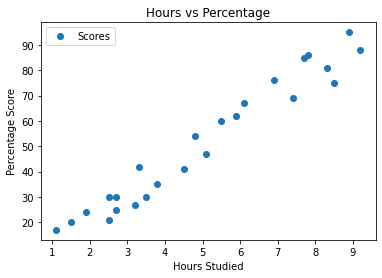

In [44]:
datasheet.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above we can observe that there's a **Linear relation** between the hours studied and percentage obtained. 

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                          test_size=0.2, random_state=0)

### **Training Algorithm**
The data is mainly divided into **two** type;


1.   **Training** set
2.   **Testing** Set

Now let's start with training the algorithms.



In [62]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Training completed.")

Training completed.


**Plotting the regression line**

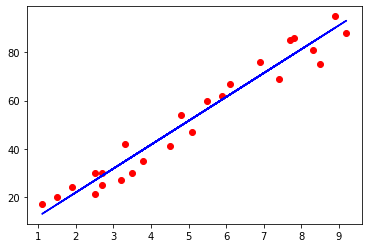

In [63]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y, color='red')
plt.plot(X, line,color= 'blue');
plt.show()

### **Making Prediction**

In [64]:
print(X_test) # Testing data - In Hours
Y_pred = regressor.predict(X_test) # Predicting the score

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [65]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### **Perdecting the score if studied for 9.25 hour**

In [68]:
datasheet = np.array(9.25)
datasheet = datasheet.reshape(-1, 1)
pred = regressor.predict(datasheet)
print("If the student studies for 9.25 hours/day, the score is {}.".format(pred))

If the student studies for 9.25 hours/day, the score is [93.69173249].


### **Evaluating the Model**

In [70]:
 print('Mean Absolute Error:', 
      metrics.mean_absolute_error(Y_test, Y_pred))

Mean Absolute Error: 4.183859899002982


In [72]:
from sklearn.metrics import r2_score
print("The R-Square of the model is: ",r2_score(Y_test,Y_pred))

The R-Square of the model is:  0.9454906892105354
